In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/Users/mac/Desktop/Project/titanic (1)/train.csv')
test = pd.read_csv('/Users/mac/Desktop/Project/titanic (1)/test.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.drop(columns = ['Name', 'Ticket', 'Cabin'], inplace = True)

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [6]:
data['Age'].replace(np.nan, data['Age'].mean(), inplace = True)
data['Embarked'].replace(np.nan, 'S', inplace = True)

In [7]:
for i in data['Sex']:
    if i == 'male':
        data['Sex'].replace('male', 1, inplace = True)
    elif i == 'female':
        data['Sex'].replace('female', 0, inplace = True)

In [8]:
for j in data['Embarked']:
    if j == 'S':
        data['Embarked'].replace('S', 1, inplace = True)
    elif j == 'C':
        data['Embarked'].replace('C', 2, inplace = True)
    elif j == 'Q':
        data['Embarked'].replace('Q', 3, inplace = True)

In [9]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1
1,2,1,1,0,38.0,1,0,71.2833,2
2,3,1,3,0,26.0,0,0,7.9250,1
3,4,1,1,0,35.0,1,0,53.1000,1
4,5,0,3,1,35.0,0,0,8.0500,1


In [10]:
X = np.array(data[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']])
Y = np.array(data['Survived'])

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)

In [12]:
print('x_train.shape', x_train.shape)
print('y_train.shape', y_train.shape)

x_train.shape (801, 8)
y_train.shape (801,)


In [13]:
print('x_test.shape', x_test.shape)
print('y_test.shape', y_test.shape)

x_test.shape (90, 8)
y_test.shape (90,)


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depth = 10
score_list = np.zeros((max_depth - 1))

for i in range(1, max_depth):
    Tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = i)
    Tree.fit(x_train, y_train)
    Tree_predict = Tree.predict(x_test)
    score_list[i - 1] = accuracy_score(y_test, Tree_predict)
score_list

array([0.8       , 0.8       , 0.83333333, 0.82222222, 0.81111111,
       0.8       , 0.78888889, 0.77777778, 0.78888889])

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depth = 10
score_list = np.zeros((max_depth - 1))

for i in range(1, max_depth):
    Tree = DecisionTreeClassifier(criterion = 'gini', max_depth = i)
    Tree.fit(x_train, y_train)
    Tree_predict = Tree.predict(x_test)
    score_list[i - 1] = accuracy_score(y_test, Tree_predict)
score_list

array([0.8       , 0.8       , 0.83333333, 0.82222222, 0.81111111,
       0.78888889, 0.77777778, 0.75555556, 0.74444444])

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depth = 10
score_list = np.zeros((max_depth - 1))

for i in range(1, max_depth):
    Tree = DecisionTreeClassifier(criterion = 'log_loss', max_depth = i)
    Tree.fit(x_train, y_train)
    Tree_predict = Tree.predict(x_test)
    score_list[i - 1] = accuracy_score(y_test, Tree_predict)
score_list

array([0.8       , 0.8       , 0.83333333, 0.82222222, 0.8       ,
       0.8       , 0.77777778, 0.78888889, 0.78888889])

In [17]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [18]:
prediction = tree.predict(x_test)
print('y_test.shape', y_test[0 : 5])
print('y_predict.shape', prediction[0 : 5])

y_test.shape [0 0 0 1 1]
y_predict.shape [0 0 0 1 1]


In [19]:
from sklearn.metrics import accuracy_score
print('Score', accuracy_score(y_test, prediction))

Score 0.8333333333333334


In [20]:
import matplotlib.pyplot as plt
import sklearn.tree as Tree

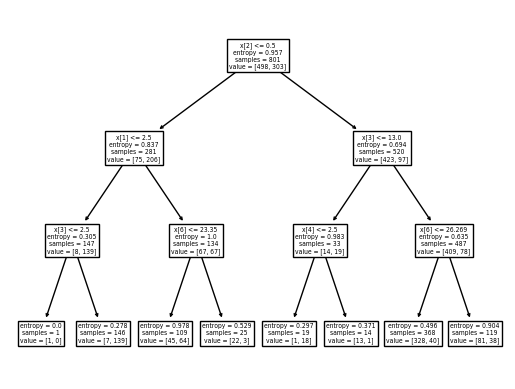

In [21]:
Tree.plot_tree(tree)
plt.show()

In [22]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
test.drop(columns = ['Name', 'Cabin', 'Ticket'], inplace = True)

In [24]:
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [25]:
test['Age'].replace(np.nan, test['Age'].mean(), inplace = True)
test['Fare'].replace(np.nan, test['Fare'].mean(), inplace = True)

In [26]:
for i in test['Sex']:
    if i == 'male':
        test['Sex'].replace('male', 1, inplace = True)
    elif i == 'female':
        test['Sex'].replace('female', 0, inplace = True)

In [27]:
for j in test['Embarked']:
    if j == 'S':
        test['Embarked'].replace('S', 1, inplace = True)
    elif j == 'C':
        test['Embarked'].replace('C', 2, inplace = True)
    elif j == 'Q':
        test['Embarked'].replace('Q', 3, inplace = True)

In [28]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,3
1,893,3,0,47.0,1,0,7.0000,1
2,894,2,1,62.0,0,0,9.6875,3
3,895,3,1,27.0,0,0,8.6625,1
4,896,3,0,22.0,1,1,12.2875,1


In [29]:
X = np.array(test[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']])

In [30]:
y_predict = tree.predict(X)
y_predict.reshape(418, 1)
test['Survived'] = pd.DataFrame(y_predict)
test.drop(columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], inplace = True)

In [31]:
test.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [32]:
test.to_csv('/Users/mac/Desktop/Submission_DS.csv', index = False)